# 🌍 π in Action: Geometry, Dimensions and the Impossible
Welcome to the final stage, number architects!

In previous workshops we learned to construct π using modular sums and prime products. We've seen how it hides in statistics and imaginary numbers. But today we're going to leave theory behind and use our tool to measure the universe.

We'll start with a dangerous question:

"If my π calculation isn't perfect... does it really matter?"

We're going to discover the "Geometric Butterfly Effect": how a tiny error in π can cause gigantic disasters when we move from 2 dimensions (circles) to 3 dimensions (spheres).

## 1. The Mission: Weighing the Earth 🌎
We know Earth isn't a perfect sphere, but for this experiment we'll assume it is.

Earth's radius: `R ≈ 6371 km`  
Sphere volume formula: `V = (4/3)πR³`

Notice that `R³`. This means we multiply the radius three times. If our π has a small error, that error will be multiplied by `R³`. That's a lot!

Let's retrieve our Modular Formula and see what happens if we're "lazy" and use few terms to build the planet.

In [1]:
# --- CODE CELL 1: Preparing the Laboratory ---
import math
import matplotlib.pyplot as plt
import numpy as np

# We retrieve our star function from Colab 1
# (We include it here so this notebook works independently)
def pi_modular(n_terms):
    """
    Calculates Pi using the Modular Theorem (6k+1 and 6k+5).
    """
    total = 0
    for k in range(n_terms):
        term = ((-1)**k) * (1/(6*k + 1) + 1/(6*k + 5))
        total += term
    return 3 * total

print("✅ Geometry tools loaded.")

✅ Geometry tools loaded.


In [2]:
# --- CODE CELL 2: The Planetary Experiment ---

def sphere_volume(radius, pi_value):
    return (4/3) * pi_value * (radius**3)

# Real data
earth_radius_km = 6371
real_volume = sphere_volume(earth_radius_km, math.pi)

# --- TEST ZONE ---
# What happens if we use few terms?
N_lazy = 10       # Only 10 sums (very little effort)
N_worker = 1000   # 1000 sums (medium effort)

# 1. Calculate our Pis
bad_pi = pi_modular(N_lazy)
better_pi = pi_modular(N_worker)

# 2. Build the Earths
bad_volume = sphere_volume(earth_radius_km, bad_pi)
better_volume = sphere_volume(earth_radius_km, better_pi)

# 3. Measure the DISASTER (Error)
bad_error = abs(real_volume - bad_volume)
better_error = abs(real_volume - better_volume)

print(f"🌍 REAL EARTH VOLUME: {real_volume:,.0f} km³")
print("-" * 60)

print(f"1️⃣ With N={N_lazy} (Pi ≈ {bad_pi:.4f}):")
print(f"   Calculated volume: {bad_volume:,.0f} km³")
print(f"   ❌ Error:           {bad_error:,.0f} km³")
print(f"   We've missed by {bad_error / 1e9:.2f} BILLION km³!")

print("-" * 60)
print(f"2️⃣ With N={N_worker} (Pi ≈ {better_pi:.4f}):")
print(f"   Calculated volume: {better_volume:,.0f} km³")
print(f"   ❌ Error:           {better_error:,.0f} km³")

# Visual comparison
# The Mediterranean Sea has approximately 3.7 million km³ volume
mediterranean_times = bad_error / 3.7e6
print(f"\n🌊 IMPACT DATA: The error with N=10 equals losing (or adding)")
print(f"   about {mediterranean_times:.0f} times the water of the entire Mediterranean Sea.")

🌍 REAL EARTH VOLUME: 1,083,206,916,846 km³
------------------------------------------------------------
1️⃣ With N=10 (Pi ≈ 3.0917):
   Calculated volume: 1,065,990,822,556 km³
   ❌ Error:           17,216,094,290 km³
   We've missed by 17.22 BILLION km³!
------------------------------------------------------------
2️⃣ With N=1000 (Pi ≈ 3.1411):
   Calculated volume: 1,083,034,519,134 km³
   ❌ Error:           172,397,711 km³

🌊 IMPACT DATA: The error with N=10 equals losing (or adding)
   about 4653 times the water of the entire Mediterranean Sea.


### 🧠 Reflection: The Tyranny of Dimensions
Did you see the result?

With `N=10`, our π approximation (`3.0917`) seemed "decent". But when using it to calculate a gigantic volume, we've lost thousands of times the Mediterranean Sea!

This teaches us two things:

1. **In 3D, errors explode:** In engineering and physics, we need extreme precision because cubic formulas (`R³`) magnify errors.
2. **Convergence matters:** Our modular method is elegant, but as we saw, it converges slowly. To design a GPS or travel to Mars, we would need millions of terms (or use Ramanujan).

Now that we understand the risk of error, let's face a different challenge. Can we calculate the area of a circle... by throwing random darts?

## 2. Order vs. Chaos: The Monte Carlo Method 🎲
So far we've used precise and ordered formulas (sums, products). But what if we had no formula? Could we find π by pure luck?

The answer is yes, using the Monte Carlo Method. The idea is simple:

1. Draw a square of side 1. (Area = `1`).
2. Draw a quarter circle inside. (Area = `π/4`).
3. Throw thousands of "darts" (random points) at the square.
4. If we count how many darts fall INSIDE the circle versus TOTAL, the proportion should be `π/4`.

$$π ≈ 4 \times \frac{\text{darts inside}}{\text{total darts}}$$

Let's program a visual simulation to see chaos in action.

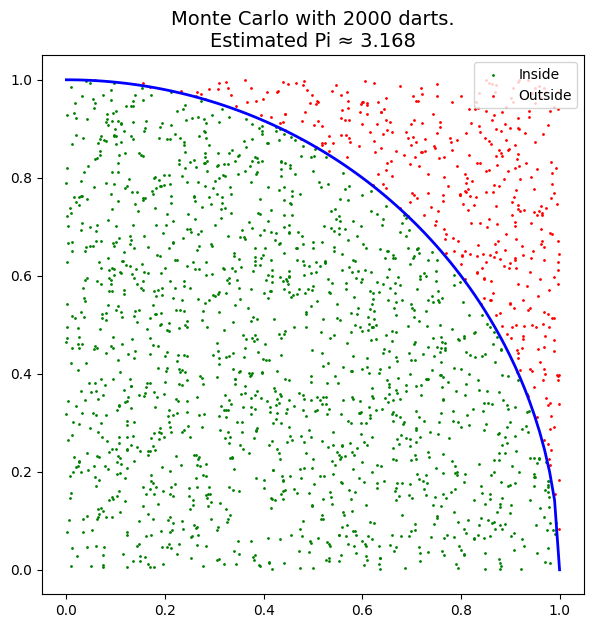

In [11]:
# --- CODE CELL 3: Throwing Darts at Pi ---

def monte_carlo_visual_simulation(n_darts):
    # 1. Generate random coordinates between 0 and 1
    x = np.random.rand(n_darts)
    y = np.random.rand(n_darts)

    # 2. Calculate distance to origin (0,0)
    # If distance <= 1, it's inside the circle
    distances = np.sqrt(x**2 + y**2)
    inside = distances <= 1

    # 3. Calculate Pi
    hits = np.sum(inside)
    pi_estimated = 4 * (hits / n_darts)

    # --- VISUALIZATION ---
    plt.figure(figsize=(7, 7))
    # Draw inside points (Green) and outside points (Red)
    plt.scatter(x[inside], y[inside], color='green', s=1, label='Inside')
    plt.scatter(x[~inside], y[~inside], color='red', s=1, label='Outside')

    # Draw the circle border for reference
    circle_x = np.linspace(0, 1, 100)
    circle_y = np.sqrt(1 - circle_x**2)
    plt.plot(circle_x, circle_y, color='blue', linewidth=2)

    plt.title(f"Monte Carlo with {n_darts} darts.\nEstimated Pi ≈ {pi_estimated}", fontsize=14)
    plt.legend(loc='upper right')
    plt.show()

# Let's throw 2000 darts!
monte_carlo_visual_simulation(2000)

## 3. The Final Duel: Modular Structure vs. Randomness
The Monte Carlo method is very useful when we don't know a problem's formula (for example, simulating weather or the stock market). But for calculating mathematical constants, which is better: randomness or order?

Let's pit your Modular Algorithm (Theorem 1) against the Monte Carlo Algorithm.

Both will have the same budget: 100,000 operations (`N`).

Who will get closer to π?

In [12]:
# --- CODE CELL 4: The Mathematical Duel ---

# 1. Contestant 1: Monte Carlo (Chaos)
def fast_monte_carlo(n):
    x = np.random.rand(n)
    y = np.random.rand(n)
    inside = (x**2 + y**2) <= 1
    return 4 * (np.sum(inside) / n)

# 2. Contestant 2: Modular Series (Order) - We recall the function
def fast_pi_modular(n):
    total = 0
    for k in range(n):
        total += ((-1)**k) * (1/(6*k + 1) + 1/(6*k + 5))
    return 3 * total

# --- FIGHT! ---
N_duel = 100000  # One hundred thousand attempts for each

# Execution
pi_random = fast_monte_carlo(N_duel)
pi_order = fast_pi_modular(N_duel)
pi_real = math.pi

# Results
error_random = abs(pi_real - pi_random)
error_order = abs(pi_real - pi_order)

print(f"🥊 DUEL RESULTS (N={N_duel}):")
print("-" * 50)
print(f"🎲 Monte Carlo says:  {pi_random:.10f}  | Error: {error_random:.10f}")
print(f"⚙️ Modular says:      {pi_order:.10f}  | Error: {error_order:.10f}")
print("-" * 50)

if error_order < error_random:
    times_better = int(error_random / error_order)
    print(f"🏆 WINNER: The Modular Method!")
    print(f"   Order is approximately {times_better} times more precise than randomness.")
else:
    print("🏆 Surprise! Randomness got lucky this time (it's rare, but possible).")

🥊 DUEL RESULTS (N=100000):
--------------------------------------------------
🎲 Monte Carlo says:  3.1464800000  | Error: 0.0048873464
⚙️ Modular says:      3.1415876536  | Error: 0.0000050000
--------------------------------------------------
🏆 WINNER: The Modular Method!
   Order is approximately 977 times more precise than randomness.


### 🧠 Reflection: Why Does Order Win?
If you ran the code, you probably saw that the Modular method crushes Monte Carlo.

1. **Monte Carlo converges very slowly** (its error decreases with the square root of `N`, proportional to `1/√N`). To gain one more decimal, you need 100 times more darts.
2. **The Modular Series converges linearly**. To gain one decimal, you only need 10 times more terms.

**Lesson:**
Using the hidden structure of numbers (the `6k` clock) is always smarter than "guessing" by throwing dice. Mathematics is about finding patterns so we don't have to depend on luck.

## 4. The Impossible: The Factorial of One-Half 🤯
You surely know how to calculate a factorial:

$$5! = 5 × 4 × 3 × 2 × 1 = 120$$

But... what if I ask you to calculate the factorial of 0.5?

$$0.5! = ?$$

Your normal calculator will give you an error. "You can't multiply numbers until you reach 1 if you start at 0.5!", it will say.

But mathematicians don't give up. They invented a smooth, continuous function that connects all factorials, called the Gamma Function (`Γ(n)`).

And guess who appears when we try to calculate the factorial of `1/2`... Exactly! Our friend `π`.

$$0.5! = \frac{\sqrt{\pi}}{2}$$

Let's use our Modular Series to calculate this "impossible" number.

In [13]:
# --- CODE CELL 5: Calculating the Factorial of 0.5 (CORRECTED) ---
import math

def half_factorial_modular(n_terms):
    """
    Calculates 0.5! using the modular approximation of Pi.
    Formula: 0.5! = sqrt(pi) / 2
    """
    # 1. We retrieve our modular formula (Theorem 1)
    total = 0
    for k in range(n_terms):
        term = ((-1)**k) * (1/(6*k + 1) + 1/(6*k + 5))
        total += term
    pi_mod = 3 * total

    # 2. Apply the Gamma Function formula
    half_factorial = math.sqrt(pi_mod) / 2

    return half_factorial

# --- EXPERIMENT ---
N = 2000

# CORRECTION: Now we call the function with the correct name
result = half_factorial_modular(N)
real_value = math.gamma(1.5)  # In Python, gamma(n) is (n-1)! -> gamma(1.5) is 0.5!

print(f"🧪 Trying to calculate 0.5! with {N} modular terms...")
print("-" * 50)
print(f"🔷 Modular Result: {result:.10f}")
print(f"✅ Real Value (Gamma): {real_value:.10f}")
print(f"❌ Error:            {abs(real_value - result):.10f}")

print("\nWE DID IT! 🎉")
print(f"We know that 0.5! is approximately {result:.4f}")

🧪 Trying to calculate 0.5! with 2000 modular terms...
--------------------------------------------------
🔷 Modular Result: 0.8861916629
✅ Real Value (Gamma): 0.8862269255
❌ Error:            0.0000352625

WE DID IT! 🎉
We know that 0.5! is approximately 0.8862


## 🎓 TRILOGY CONCLUSION: The Power of Patterns
Congratulations! You've completed the journey.

We started by adding simple fractions and ended up measuring the Earth, simulating chaos, and calculating impossible factorials.

**What have we learned in these three workshops?**

1. **Structure is everything:** Numbers aren't disordered. Using the "6k Clock," we discovered that primes and π live in the same neighborhoods (`6k±1`).
2. **π is the universe's glue:** It's not just for circles. It appears in probability (Gauss), algebra (Euler), and advanced calculus (Gamma). If π changed, all this would collapse.
3. **Mathematical Research:** You've seen how a modern mathematician works: not just seeking the answer (`π`), but finding new ways to reach it to better understand the path.

## 🚀 Your Future
The discovery we've explored (π's modular structure) is real and recent. It shows that even in topics from 3000 years ago, there are still secrets to uncover.

The next time you see π in a formula, remember: it's not just a magical number on a calculator. It's an infinite structure made of clock pieces and prime numbers.

**Thank you for researching with us!**